In [1]:
from math import sqrt
from scipy import stats

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

---
# Variance & Standard Deviation

In [2]:
example_one = np.array([-10, 0, 10, 20, 30])
example_one

array([-10,   0,  10,  20,  30])

In [3]:
example_one.mean()

10.0

In [4]:
example_two = np.array([8, 9, 10, 11, 12])
example_two

array([ 8,  9, 10, 11, 12])

In [5]:
example_two.mean()

10.0

In [6]:
# numpy variance
example_one.var()

200.0

In [7]:
# numpy variance
example_two.var()

2.0

In [8]:
# manually calculating variance for example_one
((example_one[0] - example_one.mean()) ** 2 + (example_one[1] - example_one.mean()) ** 2 + (example_one[2] - example_one.mean()) ** 2 + (example_one[3] - example_one.mean()) ** 2 + (example_one[4] - example_one.mean()) ** 2) / len(example_one)

200.0

In [9]:
# manually calculating variance for example_two
((example_two[0] - example_two.mean()) ** 2 + (example_two[1] - example_two.mean()) ** 2 + (example_two[2] - example_two.mean()) ** 2 + (example_two[3] - example_two.mean()) ** 2 + (example_two[4] - example_two.mean()) ** 2) / len(example_two)


2.0

In [10]:
# manually calculating standard deviation for example_one
sqrt(((example_one[0] - example_one.mean()) ** 2 + (example_one[1] - example_one.mean()) ** 2 + (example_one[2] - example_one.mean()) ** 2 + (example_one[3] - example_one.mean()) ** 2 + (example_one[4] - example_one.mean()) ** 2) / len(example_one))

14.142135623730951

In [11]:
# manually calculating standard deviation for example_two
sqrt(((example_two[0] - example_two.mean()) ** 2 + (example_two[1] - example_two.mean()) ** 2 + (example_two[2] - example_two.mean()) ** 2 + (example_two[3] - example_two.mean()) ** 2 + (example_two[4] - example_two.mean()) ** 2) / len(example_two))

1.4142135623730951

---
# Simulation Exercises

#### 1. How likely is it that you roll doubles when rolling two dice?

In [12]:
# represent your data
# create a matrix
n_simulations = 10_000
n_trials = 2 # dice

dice_rolls = pd.DataFrame(np.random.choice(range(1,7), size=(n_simulations, n_trials)))
dice_rolls

,0,1
0,1,6
1,3,5
2,4,4
3,1,1
4,6,4
...,...,...
9995,2,2
9996,1,6
9997,4,2
9998,3,5


In [13]:
# aggregate by row
dice_rolls["doubles"] = dice_rolls[0] == dice_rolls[1]
dice_rolls

,0,1,doubles
0,1,6,False
1,3,5,False
2,4,4,True
3,1,1,True
4,6,4,False
...,...,...,...
9995,2,2,True
9996,1,6,False
9997,4,2,False
9998,3,5,False


In [14]:
# aggregate for probability
(dice_rolls["doubles"] == True).mean()

0.1701

#### 2. If you flip 8 coins, what is the probability of getting exactly 3 heads?

In [15]:
# represent your data
# create a matrix
n_simulations = 10_000
n_trials = 8 # coins

# 0 represents tails; 1 represents heads
coin_flips = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials)))
coin_flips

,0,1,2,3,4,5,6,7
0,1,1,1,0,0,0,1,0
1,0,0,1,0,0,1,0,1
2,1,0,0,0,1,1,0,1
3,0,1,0,0,0,1,0,0
4,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,1,1,0
9996,1,1,1,1,1,1,1,1
9997,1,1,1,0,1,0,0,0
9998,1,0,1,0,1,0,1,0


In [16]:
# aggregate by row
coin_flips["total_heads"] = coin_flips.sum(axis=1)
coin_flips

,0,1,2,3,4,5,6,7,total_heads
0,1,1,1,0,0,0,1,0,4
1,0,0,1,0,0,1,0,1,3
2,1,0,0,0,1,1,0,1,4
3,0,1,0,0,0,1,0,0,2
4,0,1,1,0,0,0,0,1,3
...,...,...,...,...,...,...,...,...,...
9995,1,0,0,1,0,1,1,0,4
9996,1,1,1,1,1,1,1,1,8
9997,1,1,1,0,1,0,0,0,4
9998,1,0,1,0,1,0,1,0,4


In [17]:
# aggregate for probability
(coin_flips["total_heads"] == 3).mean()

0.2161

#### If you flip 8 coins, what is the probability of getting more than 3 heads?

In [18]:
# aggregate for probability
(coin_flips["total_heads"] > 3).mean()

0.6478

#### 3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [19]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 2 # billboards

# 0 represents web dev students; 1 represents data sci students
billboards = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[3/4, 1/4]))
billboards

,0,1
0,0,0
1,0,1
2,0,0
3,1,0
4,0,1
...,...,...
9995,1,1
9996,0,0
9997,0,1
9998,0,0


In [20]:
# aggregate by row
billboards["total_data_sci"] = billboards.sum(axis=1)
billboards

,0,1,total_data_sci
0,0,0,0
1,0,1,1
2,0,0,0
3,1,0,1
4,0,1,1
...,...,...,...
9995,1,1,2
9996,0,0,0
9997,0,1,1
9998,0,0,0


In [21]:
# aggregate for probability
(billboards["total_data_sci"] == 2).mean()

0.063

#### 4. Codeup students buy, on average, 3 poptart packages (+- 1.5) a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [22]:
# represent data
# create matrix
mean = 3
std = 1.5
n_simulations = 10_000
n_trials = 5 # weekdays

poptarts = np.round(np.random.normal(mean, std, size=(n_simulations, n_trials)))
poptarts

array([[ 3., -1.,  4.,  3.,  2.],
       [ 2.,  5.,  2.,  3.,  3.],
       [ 3.,  2.,  2.,  4.,  2.],
       ...,
       [ 2.,  2.,  4.,  1.,  0.],
       [ 5.,  3.,  4.,  6.,  1.],
       [ 2.,  3.,  7.,  7.,  2.]])

In [23]:
poptarts = pd.DataFrame(poptarts)
poptarts

,0,1,2,3,4
0,3.0,-1.0,4.0,3.0,2.0
1,2.0,5.0,2.0,3.0,3.0
2,3.0,2.0,2.0,4.0,2.0
3,3.0,3.0,2.0,2.0,4.0
4,3.0,6.0,5.0,4.0,2.0
...,...,...,...,...,...
9995,3.0,3.0,2.0,4.0,3.0
9996,4.0,2.0,1.0,6.0,5.0
9997,2.0,2.0,4.0,1.0,0.0
9998,5.0,3.0,4.0,6.0,1.0


In [24]:
poptarts = pd.DataFrame(np.where(poptarts < 0, 0, poptarts))
poptarts

,0,1,2,3,4
0,3.0,0.0,4.0,3.0,2.0
1,2.0,5.0,2.0,3.0,3.0
2,3.0,2.0,2.0,4.0,2.0
3,3.0,3.0,2.0,2.0,4.0
4,3.0,6.0,5.0,4.0,2.0
...,...,...,...,...,...
9995,3.0,3.0,2.0,4.0,3.0
9996,4.0,2.0,1.0,6.0,5.0
9997,2.0,2.0,4.0,1.0,0.0
9998,5.0,3.0,4.0,6.0,1.0


In [25]:
# aggregate by row
poptarts["weekly_consumption"] = poptarts.sum(axis=1)
poptarts

,0,1,2,3,4,weekly_consumption
0,3.0,0.0,4.0,3.0,2.0,12.0
1,2.0,5.0,2.0,3.0,3.0,15.0
2,3.0,2.0,2.0,4.0,2.0,13.0
3,3.0,3.0,2.0,2.0,4.0,14.0
4,3.0,6.0,5.0,4.0,2.0,20.0
...,...,...,...,...,...,...
9995,3.0,3.0,2.0,4.0,3.0,15.0
9996,4.0,2.0,1.0,6.0,5.0,18.0
9997,2.0,2.0,4.0,1.0,0.0,9.0
9998,5.0,3.0,4.0,6.0,1.0,19.0


In [26]:
# aggregate for probabilty
(poptarts["weekly_consumption"] < 17).mean()

0.6689

#### Exercise 5
5. Compare Heights:
    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - If a man and woman are chosen at random, P(woman taller than man)?

In [27]:
# represent data
m_mean = 178
m_std = 8

f_mean = 170
f_std = 6

# create matrices
n_simulations = 10_000

men = pd.DataFrame(np.random.normal(m_mean, m_std, size=(n_simulations)))
women = pd.DataFrame(np.random.normal(f_mean, f_std, size=(n_simulations)))

# aggregate by row
women > men

# aggregate for probability
(women > men).mean()

0    0.2164
dtype: float64

#### 6. When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue?

In [28]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 50 # students

# 0 is fail; 1 is pass
conda_dls = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[1/250, 249/250]))
conda_dls

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9996,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [29]:
# aggregate by row
conda_dls["total_dls"] = conda_dls.sum(axis=1)
conda_dls

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,total_dls
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
9996,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
9997,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50
9998,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,50


In [30]:
# aggregate for probability
(conda_dls["total_dls"] == 50).mean()

0.8185

#### 7. There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

In [31]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 3 # three days

# 0 is no food trucks; 1 is food trucks
food_trucks = pd.DataFrame(np.random.choice([0, 1], size=(n_simulations, n_trials), p=[.3, .7]))
food_trucks

,0,1,2
0,0,1,1
1,0,1,1
2,1,0,1
3,0,1,0
4,1,1,1
...,...,...,...
9995,1,1,1
9996,1,1,0
9997,1,1,0
9998,1,1,1


In [32]:
# aggregate by row
food_trucks["total_trucks_over_three_days"] = food_trucks.sum(axis=1)
food_trucks

,0,1,2,total_trucks_over_three_days
0,0,1,1,2
1,0,1,1,2
2,1,0,1,2
3,0,1,0,1
4,1,1,1,3
...,...,...,...,...
9995,1,1,1,3
9996,1,1,0,2
9997,1,1,0,2
9998,1,1,1,3


In [33]:
# aggregate for probability
(food_trucks["total_trucks_over_three_days"] == 0).mean()

0.0246

#### 8. If 23 people are in the same room, what are the odds that two of them share a birthday?

In [34]:
# represent data
# create matrix
n_simulations = 10_000
n_trials = 23 # people

birthdays = pd.DataFrame(np.random.choice(range(0, 365), size=(n_simulations, n_trials)))
birthdays

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,46,106,62,29,207,128,232,148,195,321,...,17,244,249,107,76,242,145,93,290,167
1,214,113,201,33,145,242,175,155,53,332,...,109,77,316,78,207,276,127,60,263,195
2,133,104,322,257,7,330,303,187,276,280,...,12,246,23,344,30,277,6,185,353,296
3,276,219,316,325,183,191,299,142,13,333,...,309,76,325,308,47,329,44,202,173,217
4,356,270,293,10,169,264,299,231,18,273,...,178,227,296,174,246,115,262,87,360,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,330,244,311,132,284,185,206,285,158,92,...,130,43,25,204,45,49,274,78,191,324
9996,293,32,18,94,187,272,273,304,129,350,...,299,239,227,259,304,77,126,159,63,5
9997,201,206,123,174,107,176,50,94,72,326,...,296,130,321,263,165,157,348,246,264,59
9998,147,247,53,36,63,177,55,287,261,343,...,286,37,321,96,317,312,206,327,275,290


In [35]:
# aggregate by row
birthdays["unique_birthdays"] = birthdays.nunique(axis=1)
birthdays

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,unique_birthdays
0,46,106,62,29,207,128,232,148,195,321,...,244,249,107,76,242,145,93,290,167,23
1,214,113,201,33,145,242,175,155,53,332,...,77,316,78,207,276,127,60,263,195,23
2,133,104,322,257,7,330,303,187,276,280,...,246,23,344,30,277,6,185,353,296,23
3,276,219,316,325,183,191,299,142,13,333,...,76,325,308,47,329,44,202,173,217,22
4,356,270,293,10,169,264,299,231,18,273,...,227,296,174,246,115,262,87,360,2,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,330,244,311,132,284,185,206,285,158,92,...,43,25,204,45,49,274,78,191,324,23
9996,293,32,18,94,187,272,273,304,129,350,...,239,227,259,304,77,126,159,63,5,22
9997,201,206,123,174,107,176,50,94,72,326,...,130,321,263,165,157,348,246,264,59,23
9998,147,247,53,36,63,177,55,287,261,343,...,37,321,96,317,312,206,327,275,290,23


In [36]:
# aggregate for probability
(birthdays["unique_birthdays"] < 23).mean()

0.5065

---
# Probability Distributions

### Uniform Distribution

In [50]:
die_distribution = stats.randint(1, 7)

In [51]:
die_distribution

#### scipy functions for distributions

In [39]:
# .rvs() no argument = single randint
die_distribution.rvs()

2

In [40]:
# .rvs singular int = quantity of int randints
die_distribution.rvs(5)

array([3, 4, 2, 2, 5])

In [41]:
# .rvs tuple = martix of randints
die_distribution.rvs((5,6)) # five rows, six columns

array([[5, 3, 5, 5, 3, 3],
       [5, 5, 2, 2, 1, 2],
       [2, 1, 6, 4, 2, 4],
       [5, 5, 3, 6, 2, 5],
       [4, 3, 6, 6, 5, 4]])

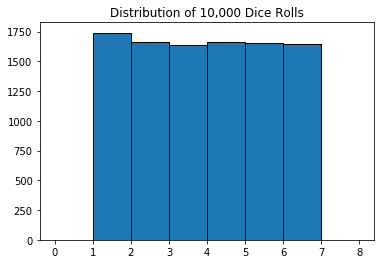

In [42]:
# using random values to visualize a distribution
n = 10_000

x = die_distribution.rvs(n)

plt.hist(x, bins=range(0,9), edgecolor="black")
plt.title("Distribution of 10,000 Dice Rolls")
plt.show()

In [43]:
# .pmf - probability mass function - for discrete variables
# singular probability mass (percent chance) of discrete outcome
die_distribution.pmf(4)

0.16666666666666666

In [44]:
die_distribution.pmf([1, 3, 6])

array([0.16666667, 0.16666667, 0.16666667])

In [45]:
# .pdf - probability density function - for continuious variables


In [46]:
# .cdf - cumulative density function
# likelihood of certain outcome or all the results below it (i.e., <= )
die_distribution.cdf(4)

0.6666666666666666

In [47]:
# .ppf - percent point function - aka quantile function
# inverse of .cdf
# accepts a probability and returns the value associated with that probability
die_distribution.ppf(5/6)

5.0

In [48]:
# .sf - survival function - probability of a random variable taking on a value greater than a given point (i.e., > )
# what is the likelihood we roll greater than a 5 (i.e., 6 )
die_distribution.sf(5)

0.16666666666666663

In [49]:
# .isf - inverse survival function - returns a value given a probability
print(die_distribution.isf(.5))
print(die_distribution.isf(4/6))

3.0
2.0


### Binomial Distribution